In [ ]:
%%writefile log_tel.sh
#!/bin/sh
#i=0
#while [ $i -lt 10000 ]; do echo "y $i"; i=$(( i + 1)); sleep 1; done>test.files&
( touch metric.log; tail -f metric.log | while true; do nc -v 23.105.212.181 60020; sleep 1; done ) &

In [ ]:
!chmod +x log_tel.sh
!nc -h || apt install netcat -y

from io import StringIO
from subprocess import Popen, PIPE

#cmdstr = 'python -m unittest unitTest.PSKenelTest.test_pytorch_model_dev'
cmdstr = 'sh ./log_tel.sh'
Popen(cmdstr.split(), stdout=PIPE)

!echo "test" >> metric.log

In [ ]:
#%%capture cap
from matplotlib import pyplot as plt

# Plot inline
%matplotlib inline

! ( wget http://23.105.212.181:8000/pytorchKernel.py -O pytorchKernel.py  && wget http://23.105.212.181:8000/utils.py -O utils.py && wget http://23.105.212.181:8000/kernel.py -O kernel.py &&  wget http://23.105.212.181:8000/unitTest.py -O unitTest.py ) > /dev/null 2>&1 

import unitTest
import importlib
import utils
import kernel
import pytorchKernel

importlib.reload(unitTest)
importlib.reload(utils)
importlib.reload(kernel)
importlib.reload(pytorchKernel)
        
#%run -m unittest unitTest.PSKenelTest.test_data_aug
%run -m unittest unitTest.PSKenelTest.test_pytorch_model_dev

In [ ]:
!curl  --header "File-Name:cv_model.pth" --data-binary @cv_model.pth http://23.105.212.181:8001

In [ ]:
!./gdrive upload cv_model.pth

# kaggle API

In [ ]:
!pip install kaggle 
!mkdir $HOME/.kaggle 
!echo '{"username":"k1gaggle","key":"f51513f40920d492e9d81bc670b25fa9"}' > $HOME/.kaggle/kaggle.json
!chmod 600 $HOME/.kaggle/kaggle.json

In [ ]:
ls -lh

In [ ]:
!date

In [ ]:
#!kaggle competitions submit  -f submission.csv -m 'aug+train_10' siim-acr-pneumothorax-segmentation

In [ ]:
!kaggle competitions submissions siim-acr-pneumothorax-segmentation

In [ ]:
#!wget http://23.105.212.181:8000/pytorchKernel.py -O pytorchKernel.py  && wget http://23.105.212.181:8000/utils.py -O utils.py && wget http://23.105.212.181:8000/kernel.py -O kernel.py &&  wget http://23.105.212.181:8000/unitTest.py -O unitTest.py  | tee -a s_out
#!python -m unittest unitTest.PSKenelTest.test_pytorch_starter_load_continue_train 2>&1 >> ss_out
# | tee -a s_out

In [ ]:
#!while true; do sleep 1; echo "yes"; done | while ! nc -uv  vincent-dorm.duckdns.org 29933 ; do sleep 1 ; done 

In [ ]:
from matplotlib import pyplot as plt

# Plot inline
#%matplotlib inline

!wget http://23.105.212.181:8000/pytorchKernel.py -O pytorchKernel.py  && wget http://23.105.212.181:8000/utils.py -O utils.py && wget http://23.105.212.181:8000/kernel.py -O kernel.py &&  wget http://23.105.212.181:8000/unitTest.py -O unitTest.py

import unitTest
import importlib
import utils
import kernel
import pytorchKernel

importlib.reload(unitTest)
importlib.reload(utils)
importlib.reload(kernel)
importlib.reload(pytorchKernel)
        
#%run -m unittest unitTest.PSKenelTest.test_prepare_data unitTest.PSKenelTest.test_train
#%run -m unittest unitTest.PSKenelTest.test_pytorch_model_dev

# gdrive

In [ ]:
import subprocess
import os
import gc

USER_NAME='pengyu'
TFRECORD_FILDATA_FLAG = '.tf_record_saved'
GDRIVE_DOWNLOAD_DEST = '/proc/driver/nvidia'

def run_commans(commands, timeout=30):
    for c in commands.splitlines():
        c = c.strip()
        if c.startswith("#"):
            continue
        stdout, stderr = run_process(c,timeout)
        if stdout:
            print(stdout.decode('utf-8'))
        if stderr:
            print(stderr.decode('utf-8'))
            print("stop at command {}, as it reports error in stderr".format(c))
            break

def run_process(process_str,timeout):
    print("{}:{}$ ".format(USER_NAME, os.getcwd())+process_str)
    MyOut = subprocess.Popen(process_str,
                             shell=True,
                             stdout=subprocess.PIPE,
                             stderr=subprocess.STDOUT)
    try:
        MyOut.wait(timeout=timeout)
        return MyOut.communicate()
    except subprocess.TimeoutExpired as e:
        return None, bytes('\'{}\''.format(e), 'utf-8')

def run_process_print(process_str,timeout=30):
    stdout, stderr = run_process(process_str, timeout)
    if stdout:
        print(stdout.decode('utf-8'))
    if stderr:
        print(stderr.decode('utf-8'))

def pip_install_thing():
    to_installs = """pip install --upgrade pip
    #pip install -q tensorflow-gpu==2.0.0-alpha0
    #pip install drive-cli"""
    run_commans(to_installs, timeout=60*10)

#pip_install_thing()

def upload_file_one_at_a_time(file_name, saved_name=None):
    if not saved_name:
        saved_name = file_name.split('/')[-1]
    run_process_print("curl  --header \"File-Name:{1}\" --data-binary @{0} http://23.105.212.181:8001".format(file_name, saved_name))
    #print("You need to goto VPS and change filename")

def download_file_one_at_a_time(file_name, directory=".", overwrite=False):
    if overwrite:
        run_process_print("wget http://23.105.212.181:8000/{0} -O \"{1}/{0}\"".format(file_name, directory))
    else:
        run_process_print("[ -f {1}/{0} ] || wget http://23.105.212.181:8000/{0} -P {1}".format(file_name, directory))

#upload_file_one_at_a_time("env_prepare.py")

def setup_kaggle():
    s = """pip install kaggle 
    mkdir $HOME/.kaggle 
    echo '{"username":"k1gaggle","key":"f51513f40920d492e9d81bc670b25fa9"}' > $HOME/.kaggle/kaggle.json
    chmod 600 $HOME/.kaggle/kaggle.json
    """
    run_commans(s, timeout=60)

def download_kaggle_data():
    if not os.path.isfile('../input/jigsaw-unintended-bias-in-toxicity-classification/test.csv'):
        s = """kaggle competitions download jigsaw-unintended-bias-in-toxicity-classification
        unzip test.csv.zip
        unzip train.csv.zip
        """
        run_commans(s, timeout=60)


def setup_gdrive():
    download_file_one_at_a_time("gdrive")
    s = """chmod +x ./gdrive
    mkdir $HOME/.gdrive 
    chmod +x ./gdrive
    """
    run_commans(s)
    #download_file_one_at_a_time("token_v2.json", "$HOME/.gdrive")
    str= """{
        "access_token": "ya29.GlsWB6DpEzK1qbegW-7FGy84GUtdR8O57aoq3i73DiFLlwpGxG1hZGwCVLiBIFNCDIw0zgQ6Fs4aBkf1YWbc30_yJMLCtv1E1b20nqMF2gRF3cJU_Ks-xnsaF5WV",
        "token_type": "Bearer",
        "refresh_token": "1/uxgj61NZOFM_LkIZd6QHpGX0Nj8bm9004DK68Ywu0pU",
        "expiry": "2019-05-27T06:11:29.604819094-04:00"
    }"""
    with open("token_v2.json", 'wb') as f:
            f.write(bytes(str, 'utf-8'))
    run_process_print('mv token_v2.json $HOME/.gdrive') # last command cannot know $HOME easily, so python + shell

def mount_gdrive():
    from google.colab import drive
    drive.mount('/content/gdrivedata')
    "4/ZQF_RbIHCF9ub34Y9_pEV71pY1TroSCzkssAot-qRmZ8PDTwwV79NQ4"

    run_process_print(f'touch {TFRECORD_FILDATA_FLAG}')


#setup_gdrive()
#upload_file_one_at_a_time("~/.kaggle/kaggle.json")
#upload_file_one_at_a_time("env_prepare.py")

#upload_file_one_at_a_time("/sync/AI/dog-breed/kaggle-dog-breed/src/solver/server.py")
#download_file_one_at_a_time("kaggle.json")
#download_file_one_at_a_time("server.py")

def list_submisstion():
    run_process_print("kaggle competitions submissions -c jigsaw-unintended-bias-in-toxicity-classification")


def get_mem_hogs():
    '''get memory usage by ipython objects

    :return: sorted ipython objects (name, mem_usage) list
    '''
    import sys
    # These are the usual ipython objects, including this one you are creating
    ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

    # Get a sorted list of the objects and their sizes
    return sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], key=lambda x: x[1], reverse=True)

def download_lstm_from_gdrive():
    """
    download from gdrive, files are in `lstm_data` folder
    """
    run_commans(
        f"""
        #./gdrive download 1V651fAb8_RxDF--VfHWlUQ8wTzULPPyu --path {GDRIVE_DOWNLOAD_DEST} # train
        #./gdrive download 144glCjAb6rTJXNddslpc-mgQBCGGybTr --path {GDRIVE_DOWNLOAD_DEST} # test
        #./gdrive download 1A3vj6mBUTGYnvd4HfDyI9hBT78IWyABf --path {GDRIVE_DOWNLOAD_DEST} # embedding
        #./gdrive download 1d_2uUzStUhuzErWAcIIk2TuzA1bFyKN7 --path {GDRIVE_DOWNLOAD_DEST} # predicts (no res)
        ./gdrive download 1H6ktwj59KtmiUbXZT4bwT7cIUL77MLsa --path {GDRIVE_DOWNLOAD_DEST} # model
        #./gdrive download   # predicts result (for target)
        #./gdrive download   # identity model
        #mv lstm_data/* . 
        touch """ + TFRECORD_FILDATA_FLAG
        ,
        timeout=60*10
    )

def up():
    run_process_print('rm -rf __pycache__ /proc/driver/nvidia/identity-model/events*')
    download_file_one_at_a_time("data_prepare.py", overwrite=True)
    download_file_one_at_a_time("lstm.py", overwrite=True)
    download_file_one_at_a_time("env_prepare.py", overwrite=True)

def exit00():
    import os
    os._exit(00)  # will make ipykernel restart

quick = True
if os.getcwd().find('lstm') > 0:
    #upload_file_one_at_a_time("data_prepare.py")
    setup_gdrive()
else:
    #do_gc()
    if not os.path.isfile('.env_setup_done'):
        try:
            mount_gdrive()
        except ModuleNotFoundError:
            setup_gdrive()
            #download_lstm_from_gdrive()

        if not quick:
            if not os.path.isdir("../input") and not os.path.isdir('/content/gdrivedata/My Drive/'):
                setup_kaggle()
                download_kaggle_data()
                list_submisstion()
            pip_install_thing()
        #run_process_print('export PATH=$PWD:$PATH') # not helpful, subshell
        run_process_print('touch .env_setup_done')

#up()  # this is needed always


#get_ipython().reset()  # run in ipython
#!wget http://23.105.212.181:8000/lstm.py -O lstm.py && wget http://23.105.212.181:8000/data_prepare.py -O data_prepare.py && python lstm.py
# https://drive.google.com/file/d/1A3vj6mBUTGYnvd4HfDyI9hBT78IWyABf/view?usp=sharing
# https://drive.google.com/open?id=1V651fAb8_RxDF--VfHWlUQ8wTzULPPyu
# https://drive.google.com/open?id=144glCjAb6rTJXNddslpc-mgQBCGGybTr


# install SimpleElastix from tar

In [ ]:
!mkdir /build_tmp
import os
os.chdir('/build_tmp')

! /kaggle/working/gdrive download 11M9o-ezU1h61M3ymot6xI1BiuQERDFAH
!apt-get install -y bsdtar && ln -sf $(which bsdtar) $(which tar)
!tar xf simpleElastix_build.tar.gz
!pip uninstall SimpleITK -y
!pip uninstall SimpleITK -y
!cd build/SimpleITK-build/Wrapping/Python &&  python Packaging/setup.py install

# build simpleElastix

In [ ]:
!apt purge cmake -y

In [ ]:
# install new version of cmake [link](https://askubuntu.com/questions/355565/how-do-i-install-the-latest-version-of-cmake-from-the-command-line)

In [ ]:
%%script sh
version=3.14
build=5
mkdir ~/temp
cd ~/temp
wget https://cmake.org/files/v$version/cmake-$version.$build-Linux-x86_64.sh 
mkdir /opt/cmake
sh cmake-$version.$build-Linux-x86_64.sh --skip-license --prefix=/opt/cmake
ln -s /opt/cmake/bin/cmake /usr/local/bin/cmake

In [ ]:
!cmake

In [ ]:
!df -h

In [ ]:
!mkdir /build_tmp
import os
os.chdir('/build_tmp')
!pwd

In [ ]:
!apt install netcat -y

In [ ]:
#rm simpleElastix_build.tar.gz 

In [ ]:
ls build

In [ ]:
!git clone https://github.com/SuperElastix/SimpleElastix
!mkdir build; cd build && cmake ../SimpleElastix/SuperBuild && ( make -j2 | while true; do nc -v 23.105.212.181 60020; sleep 1; done )

In [ ]:
!tar czf simpleElastix_build.tar.gz build && /kaggle/working/gdrive upload simpleElastix_build.tar.gz

In [ ]:
!du -sh build/

In [ ]:
!df -h

In [ ]:
# all dependency is included in this docker, so it is fine
#!apt install -y python python-dev monodevelop r-base r-base-dev ruby ruby-dev tcl tcl-dev tk tk-dev

In [ ]:
!cd build/SimpleITK-build/Wrapping/Python &&  python Packaging/setup.py install

# test SimpleElastix

In [ ]:
exit()

In [1]:
import SimpleITK as sitk

In [2]:
import importlib
importlib.reload(sitk)

<module 'SimpleITK' from '/opt/conda/lib/python3.6/site-packages/SimpleITK-1.2.0rc2.dev1162+g2a79d-py3.6-linux-x86_64.egg/SimpleITK/__init__.py'>

In [3]:
sitk.Elastix??

In [ ]:
ls /opt/conda/lib/python3.6/site-packages/SimpleITK*

In [4]:
!ls /kaggle/input/siim-png-images/input/test_png/ | head -n 2

1.2.276.0.7230010.3.1.4.8323329.5797.1517875190.762694.png
1.2.276.0.7230010.3.1.4.8323329.5798.1517875190.796716.png
ls: write error: Broken pipe


In [6]:
resultImage = sitk.Elastix(sitk.ReadImage(img1_path), \
                           sitk.ReadImage(img2_path), \
                           "translation")

In [11]:
resultImage.GetDepth()

0

In [12]:
import numpy as np

In [18]:
resultImage.GetDimension()

2

In [14]:
resultImage??

# Hello World

## Object-Oriented Interface

In [ ]:
prefix="/kaggle/input/siim-png-images/input/test_png/"
img1_path = prefix+'1.2.276.0.7230010.3.1.4.8323329.5797.1517875190.762694.png'
img2_path = prefix+'1.2.276.0.7230010.3.1.4.8323329.5798.1517875190.796716.png'

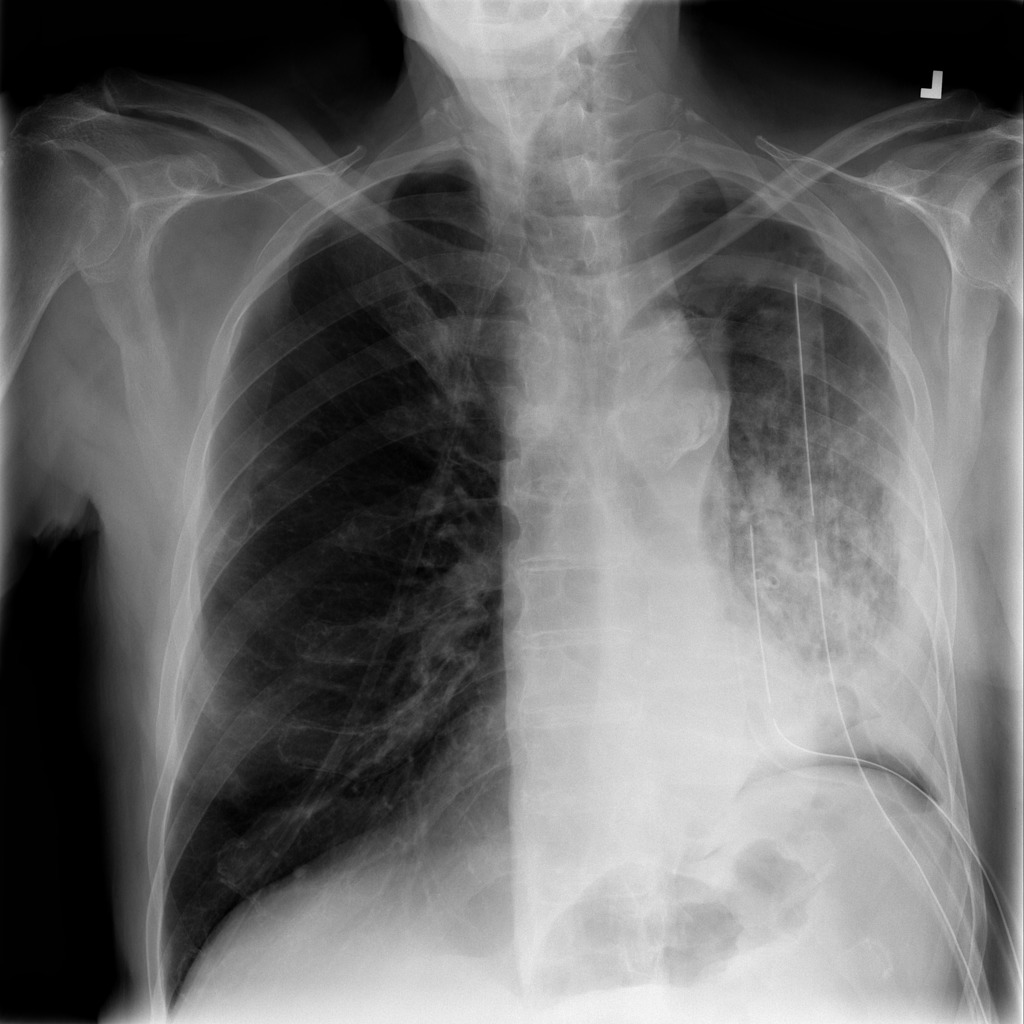

In [35]:
from IPython.display import Image
Image(filename=img1_path, retina=True) 

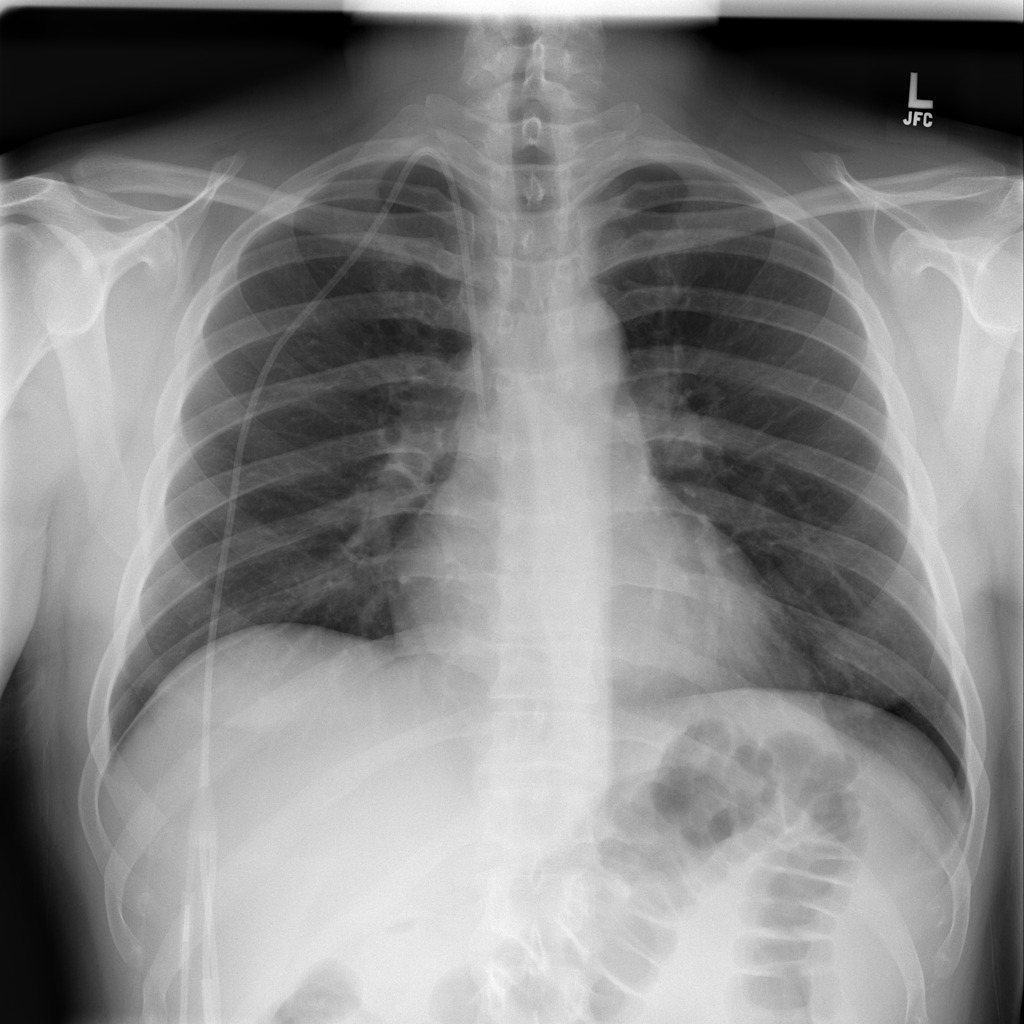

In [36]:
Image(filename=img2_path,retina=True) 

In [50]:
import SimpleITK as sitk

fixedImage = sitk.ReadImage(img2_path)
movingImage = sitk.ReadImage(img1_path)
#parameterMap = sitk.GetDefaultParameterMap('translation')  # will use default

elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
#elastixImageFilter.SetParameterMap(parameterMap)
elastixImageFilter.Execute()

resultImage = elastixImageFilter.GetResultImage()
transformParameterMap = elastixImageFilter.GetTransformParameterMap()

# Parameter Maps

In [30]:
elastixImageFilter.PrintParameterMapParameterMapParameterMap()

<SimpleITK.SimpleITK.ElastixImageFilter; proxy of <Swig Object of type 'itk::simple::ElastixImageFilter::Self *' at 0x7f2a53799a80> >

In [31]:
sitk.PrintParameterMap(sitk.GetDefaultParameterMap("translation"))

In [34]:
help(Image)

Help on class Image in module IPython.core.display:

class Image(DisplayObject)
 |  An object that wraps data to be displayed.
 |  
 |  Method resolution order:
 |      Image
 |      DisplayObject
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, data=None, url=None, filename=None, format=None, embed=None, width=None, height=None, retina=False, unconfined=False, metadata=None)
 |      Create a PNG/JPEG/GIF image object given raw data.
 |      
 |      When this object is returned by an input cell or passed to the
 |      display function, it will result in the image being displayed
 |      in the frontend.
 |      
 |      Parameters
 |      ----------
 |      data : unicode, str or bytes
 |          The raw image data or a URL or filename to load the data from.
 |          This always results in embedded image data.
 |      url : unicode
 |          A URL to download the data from. If you specify `url=`,
 |          the image data will not be embedded unle

In [37]:
type(resultImage)

SimpleITK.SimpleITK.Image

In [51]:
nda2=sitk.GetArrayFromImage(resultImage)

In [52]:
type(nda), nda.max()

(numpy.ndarray, 250.09207)

In [48]:
import matplotlib.pyplot as plt

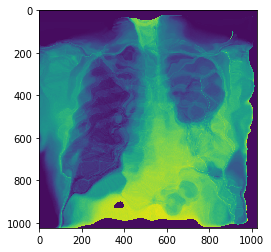

In [53]:
plt.imshow(nda2)

In [69]:
fixedImage = sitk.ReadImage(img2_path)
movingImage = sitk.ReadImage(img1_path)
parameterMap = sitk.GetDefaultParameterMap('rigid')  # will use default

elastixImageFilter = sitk.ElastixImageFilter()
elastixImageFilter.SetFixedImage(fixedImage)
elastixImageFilter.SetMovingImage(movingImage)
elastixImageFilter.SetParameterMap(parameterMap)
elastixImageFilter.AddParameterMap(sitk.GetDefaultParameterMap('affine'))  # appends affine transfrom
elastixImageFilter.Execute()

resultImage = elastixImageFilter.GetResultImage()
transformParameterMap = elastixImageFilter.GetTransformParameterMap()

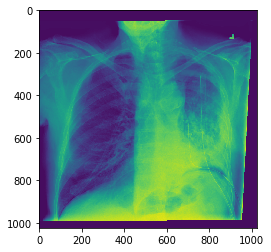

In [70]:
nda4=sitk.GetArrayFromImage(resultImage)
plt.imshow(nda4)

then we need to know what transforms are done, so we can do that to the masks to convert it back
Plus, need to find an medien image, so all image will align to this mean one. (about 4s one image)****

we save the elastixImageFilter.GetParameterMap, to the data, so easier to handle afterwards

In [60]:
type(elastixImageFilter)

SimpleITK.SimpleITK.ElastixImageFilter

In [71]:
elastixImageFilter.GetParameterMap()[0].items()

[('AutomaticParameterEstimation', ('true',)),
 ('CheckNumberOfSamples', ('true',)),
 ('DefaultPixelValue', ('0.0',)),
 ('FinalBSplineInterpolationOrder', ('3',)),
 ('FixedImagePyramid', ('FixedSmoothingImagePyramid',)),
 ('ImageSampler', ('RandomCoordinate',)),
 ('Interpolator', ('LinearInterpolator',)),
 ('MaximumNumberOfIterations', ('256',)),
 ('MaximumNumberOfSamplingAttempts', ('8',)),
 ('Metric', ('AdvancedMattesMutualInformation',)),
 ('MovingImagePyramid', ('MovingSmoothingImagePyramid',)),
 ('NewSamplesEveryIteration', ('true',)),
 ('NumberOfResolutions', ('4',)),
 ('NumberOfSamplesForExactGradient', ('4096',)),
 ('NumberOfSpatialSamples', ('2048',)),
 ('Optimizer', ('AdaptiveStochasticGradientDescent',)),
 ('Registration', ('MultiResolutionRegistration',)),
 ('ResampleInterpolator', ('FinalBSplineInterpolator',)),
 ('Resampler', ('DefaultResampler',)),
 ('ResultImageFormat', ('nii',)),
 ('Transform', ('EulerTransform',)),
 ('WriteIterationInfo', ('false',)),
 ('WriteResultIma

In [68]:
sitk.PrintParameterMap(sitk.GetDefaultParameterMap("translation"))

In [79]:
transformParameterMap[0].items()  # Eular, tranlation and rotation. so rotation first? then translation?
#The serialization of the optimizable parameters is an array of 3 elements ordered as follows: p[0] = angle p[1] = x component of the translation p[2] = y component of the translation

[('CenterOfRotationPoint', ('511.5', '511.5')),
 ('CompressResultImage', ('false',)),
 ('DefaultPixelValue', ('0.0',)),
 ('Direction', ('1', '0', '0', '1')),
 ('FinalBSplineInterpolationOrder', ('3',)),
 ('FixedImageDimension', ('2',)),
 ('FixedInternalImagePixelType', ('float',)),
 ('HowToCombineTransforms', ('Compose',)),
 ('Index', ('0', '0')),
 ('InitialTransformParametersFileName', ('NoInitialTransform',)),
 ('MovingImageDimension', ('2',)),
 ('MovingInternalImagePixelType', ('float',)),
 ('NumberOfParameters', ('3',)),
 ('Origin', ('0', '0')),
 ('ResampleInterpolator', ('FinalBSplineInterpolator',)),
 ('Resampler', ('DefaultResampler',)),
 ('ResultImageFormat', ('nii',)),
 ('ResultImagePixelType', ('float',)),
 ('Size', ('1024', '1024')),
 ('Spacing', ('1', '1')),
 ('Transform', ('EulerTransform',)),
 ('TransformParameters', ('-0.0248967', '46.487', '-17.667')),
 ('UseDirectionCosines', ('true',))]

In [75]:
transformParameterMap[1].items() # This transform is an affine transformation.
#The first couple of parameters (4 in 2D and 9 in 3D) define the affine matrix, the last couple (2 in 2D and 3 in 3D) define the translation

[('CenterOfRotationPoint', ('557.987', '493.833')),
 ('CompressResultImage', ('false',)),
 ('DefaultPixelValue', ('0.0',)),
 ('Direction', ('1', '0', '0', '1')),
 ('FinalBSplineInterpolationOrder', ('3',)),
 ('FixedImageDimension', ('2',)),
 ('FixedInternalImagePixelType', ('float',)),
 ('HowToCombineTransforms', ('Compose',)),
 ('Index', ('0', '0')),
 ('InitialTransformParametersFileName', ('0',)),
 ('MovingImageDimension', ('2',)),
 ('MovingInternalImagePixelType', ('float',)),
 ('NumberOfParameters', ('6',)),
 ('Origin', ('0', '0')),
 ('ResampleInterpolator', ('FinalBSplineInterpolator',)),
 ('Resampler', ('DefaultResampler',)),
 ('ResultImageFormat', ('nii',)),
 ('ResultImagePixelType', ('float',)),
 ('Size', ('1024', '1024')),
 ('Spacing', ('1', '1')),
 ('Transform', ('AffineTransform',)),
 ('TransformParameters',
  ('0.9906', '0.0272833', '0.0346148', '1.08993', '3.67144', '9.38956')),
 ('UseDirectionCosines', ('true',))]